## Analysis of Top 250 Movies On IMDb - A Web Scraping Project

IMDb(Internet Movies Database) is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. IMDb which began as a fan-operated movie database  as grown to be one of the most popular and trusted source for tv, movies reviews etc content.

This project explores data of a list of the top 250 movies on IMDb. It seeks to understand the characteristics of these movies / by what criteria IMDb uses to qualify them as 'TOP'.

The data used for this project was scrapped from IMDb website, processed and explored to bring about insights.

In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Gathering
Information to be gathered includes:
* movie_name : name of the movie
* year : year it was released
* runtime : duration of movies in min
* genre: category of the film
* rating : average rating by the voters
* metascore:score given by metacritic
* votes: number of users who gave ratings
* gross : gross revenue of the movie in dollars(M)
* rank : rank of the movie on the list from 1-250

In [3]:
#Making a list of the urls since they are split into 5 pages
urls = ['https://www.imdb.com/search/title/?groups=top_250&sort=user_rating',
       'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt']

In [4]:
# Making a list to store the scrapped information
df_list = []

# Looping through each url
for url in urls:
    response = requests.get(url)
    print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    movie_data = soup.find_all('div', class_= 'lister-item-content')

    #looping through each movie description
    for movie in movie_data:
        movie_name = movie.h3.a.text
        year = movie.h3.find('span', class_ ="lister-item-year text-muted unbold").text.replace('(', '').replace(')', '').replace('I', '')
        runtime = movie.p.find('span', class_ ="runtime").text.replace(' min', '')
        genre = movie.p.find('span',  class_ ="genre").text.strip()
        rating = movie.find('strong').text
        metascore = movie.find('span',  class_ ="metascore").text.strip() if movie.find('span', class_ = 'metascore') else''
        values = movie.find_all('span',  attrs = {'name':"nv"} )
        votes = values[0].text.replace(',', '')
        gross = values[1].text.replace('$', '').replace('M', '') if len(values) >  2 else ''
        rank = values[1].text.replace('#', '') if len(values) == 2 else values[2].text.replace('#', '')

         #Append to list of dictionaries
        df_list.append({'movie_name': movie_name,
                            'year': year,
                       'runtime(min)': runtime,
                       'genre': genre,
                       'rating': rating,
                       'metascore': metascore,
                       'votes': votes,
                       'gross($)(M)': gross, 
                       'rank': rank})
    df = pd.DataFrame(df_list, columns = ['movie_name', 'year', 'runtime(min)', 'genre', 'rating', 
                                          'metascore', 'votes', 'gross($)(M)', 'rank'])

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [25]:
df.sample(10)

,movie_name,year,runtime(min),genre,rating,metascore,votes,gross($)(M),rank
150,L.A. Confidential,1997,138,"Crime, Drama, Mystery",8.2,91,586462,64.62,117
119,Ladri di biciclette,1948,89,Drama,8.3,,165341,0.33,121
121,Pather Panchali,1955,125,Drama,8.3,,33899,0.54,223
237,The Grapes of Wrath,1940,129,Drama,8.1,96,94557,0.06,234
14,Jai Bhim,2021,164,"Crime, Drama, Mystery",8.8,,203417,,235
225,Ben-Hur,1959,212,"Adventure, Drama",8.1,90,241374,74.70,183
71,Kimi no na wa.,2016,106,"Animation, Drama, Fantasy",8.4,79,272897,5.02,82
51,Rear Window,1954,112,"Mystery, Thriller",8.5,100,494941,36.76,49
103,Lawrence of Arabia,1962,218,"Adventure, Biography, Drama",8.3,100,296507,44.82,96
243,La battaglia di Algeri,1966,121,"Drama, War",8.1,96,61212,0.06,230


In [6]:
# Save data to csv file
df.to_csv('Top 250 Movies IMDb.csv', index=False)

### Data processing / Cleaning

In [7]:
data = pd.read_csv('Top 250 Movies IMDb.csv')
data.sample(10)

,movie_name,year,runtime(min),genre,rating,metascore,votes,gross($)(M),rank
83,Paths of Glory,1957,88,"Drama, War",8.4,90.0,198323,NaN,60
72,Mononoke-hime,1997,134,"Animation, Action, Adventure",8.4,76.0,395469,2.38,79
24,La vita è bella,1997,116,"Comedy, Drama, Romance",8.6,59.0,694745,57.60,25
109,Lawrence of Arabia,1962,218,"Adventure, Biography, Drama",8.3,100.0,294945,44.82,98
57,Kimi no Na wa.,2016,106,"Animation, Drama, Fantasy",8.4,79.0,269123,5.02,82
10,The Lord of the Rings: The Two Towers,2002,179,"Action, Adventure, Drama",8.8,87.0,1663377,342.55,13
105,The Sting,1973,129,"Comedy, Crime, Drama",8.3,83.0,263426,159.60,110
113,Vertigo,1958,128,"Mystery, Romance, Thriller",8.3,100.0,403444,3.20,100
47,Alien,1979,117,"Horror, Sci-Fi",8.5,89.0,882244,78.90,51
48,Once Upon a Time in the West,1968,165,Western,8.5,80.0,330372,5.32,48


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    250 non-null    object 
 1   year          250 non-null    int64  
 2   runtime(min)  250 non-null    int64  
 3   genre         250 non-null    object 
 4   rating        250 non-null    float64
 5   metascore     229 non-null    float64
 6   votes         250 non-null    int64  
 7   gross($)(M)   220 non-null    float64
 8   rank          250 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 17.7+ KB


### Data Analysis / Visualization

In [9]:
# Summary Statistics
data.describe()

,year,runtime(min),rating,metascore,votes,gross($)(M),rank
count,250.000000,250.000000,250.000000,229.000000,2.500000e+02,220.000000,250.000000
mean,1986.488000,129.008000,8.309600,82.397380,6.382201e+05,98.075000,125.500000
std,25.225287,29.817112,0.227938,10.898422,5.155909e+05,137.176537,72.312977
min,1921.000000,45.000000,8.000000,55.000000,3.033700e+04,0.010000,1.000000
25%,1966.250000,108.000000,8.100000,75.000000,2.221732e+05,6.182500,63.250000
50%,1994.000000,126.500000,8.200000,84.000000,4.922405e+05,41.330000,125.500000
75%,2006.750000,145.000000,8.400000,90.000000,9.573938e+05,140.922500,187.750000
max,2022.000000,238.000000,9.300000,100.000000,2.673004e+06,858.370000,250.000000


### Univariate Analysis
**Years with the most 'Top' Movies**

In [10]:
year_10 = data['year'].value_counts().head(10)
year_10

1995    8
2004    7
2009    6
2003    6
1957    6
2019    6
1999    6
1975    5
2007    5
2000    5
Name: year, dtype: int64

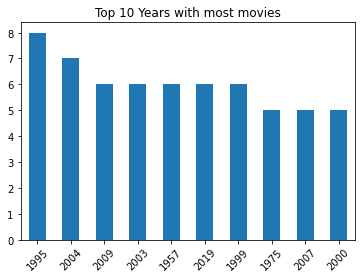

In [11]:
year_10.plot(kind = 'bar', rot = 45)
plt.title('Top 10 Years with most movies');

The year with the highest top movies was 1995. The years are also random and not mostly from the old or new years.

**Distributions**

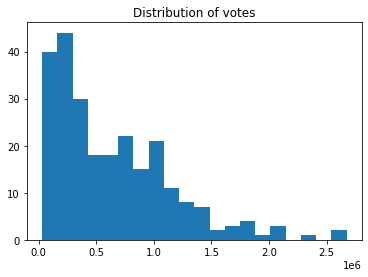

In [12]:
# distribution of votes
plt.hist(data['votes'], bins = 20)
plt.title('Distribution of votes');

Majority of the votes are less than 500,000. We can also see that there are very few movies with votes above 1.5 million. We would see if these movies are the very top movies.

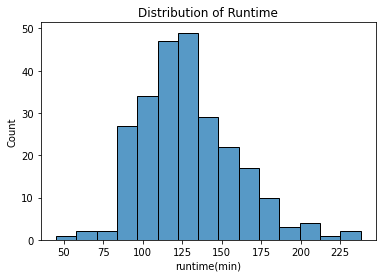

In [13]:
# distribution of runtime
sns.histplot(data['runtime(min)'], bins = 15)
plt.title('Distribution of Runtime');

The graph shows that the majority of the movies are around 100 to 150 minutes. The summary statistics also gave us a mean of 125 minutes which is a little above 2hours.

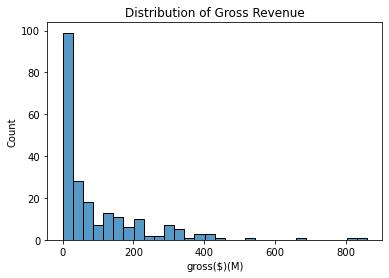

In [14]:
# distribution of gross revenue
sns.histplot(data['gross($)(M)'], bins = 30)
plt.title('Distribution of Gross Revenue');

Majority of the movies grossed less than 100 million with one or two around 600 and 800.

**Are the years with low gross revenues the old years?**

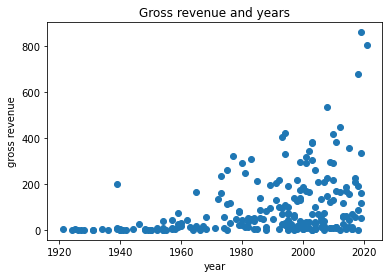

In [15]:
plt.scatter(data = data, x='year', y='gross($)(M)')
plt.xlabel('year')
plt.ylabel('gross revenue')
plt.title('Gross revenue and years');

The graph shows that very high gross revenues were from recent years. This could also be affected by the value of money as it would have been worth it to watch a movie wih a few cents in the old years than now. A data on the budget of the movies would be nice to get a comparison of the profits over the years. 

#### Comparing the Rankings with other features
**Are the highest ranked movies the ones with very high gross revenue?**

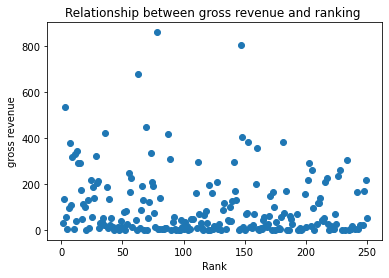

In [16]:
plt.scatter(data = data, x='rank', y='gross($)(M)')
plt.title('Relationship between gross revenue and ranking ')
plt.ylabel('gross revenue')
plt.xlabel('Rank');

The graph does not really show any pattern relating to high gross revenue and the rank of the movies. One would expect that movies ranked between 1-50 would have higher gross revenue but the data points are widely distributed. We can also see that the 3 movies above 600 and 800 million fall into the middle ranked.

**Relationship between Rank and Runtime**

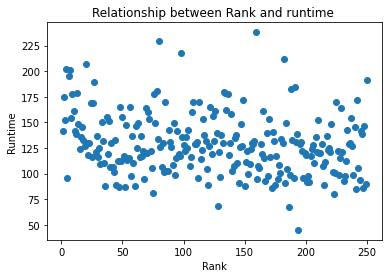

In [17]:
plt.scatter(data = data, x='rank', y='runtime(min)')
plt.title('Relationship between Rank and runtime ')
plt.xlabel('Rank')
plt.ylabel('Runtime');

As seen with the histogram chart, most movies duration are between 100 and 150 minutes which is a little less than 2 hours to 2 hours and 30 mins. There is also very little correlation. 

**Relationship Between Metascore and Rank**

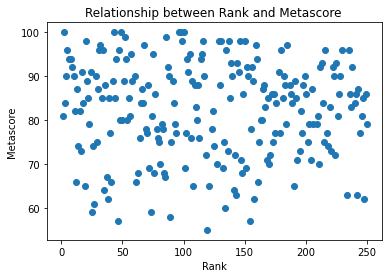

In [18]:
plt.scatter(data = data, x='rank', y='metascore')
plt.title('Relationship between Rank and Metascore ')
plt.xlabel('Rank')
plt.ylabel('Metascore');

**Relationship between Rank and Votes**

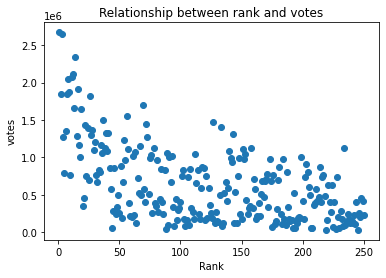

In [19]:
plt.scatter(data = data, x='rank', y='votes')
plt.xlabel('Rank')
plt.ylabel('votes')
plt.title('Relationship between rank and votes');

There is a pattern here. The top ranked movies have more votes compared to those further down the rank.

**Relationship between Rank and Rating**

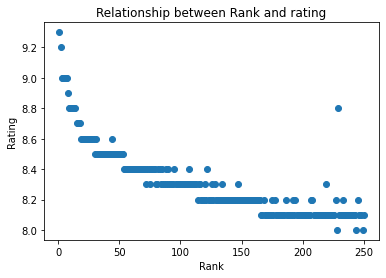

In [20]:
plt.scatter(data = data, x='rank', y='rating')
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.title('Relationship between Rank and rating');

Here, we also see that there is a high correlation between rank and rating.

**Relationship Between Rating and votes**

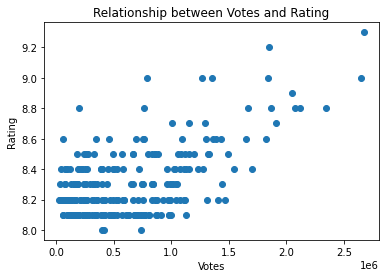

In [21]:
plt.scatter(data = data, y='rating', x='votes')
plt.ylabel('Rating')
plt.xlabel('Votes')
plt.title('Relationship between Votes and Rating');

All these movies are highly rated but we see those above 8.8 correlates with those also around 1.5 million votes.  
Lastly, let's see the relationship between these three variables.

**Relationship between Rank, Rating and Votes**

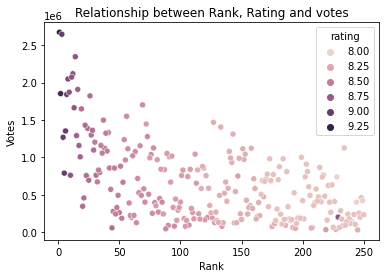

In [22]:
sns.scatterplot(data = data, x='rank', y='votes', hue = 'rating')
plt.xlabel('Rank')
plt.ylabel('Votes')
plt.title('Relationship between Rank, Rating and votes');

As expected the very top ranked movies have the highest rating expect for an oulier around 200-250 rank and also have the highest votes.

**Heatmap showing correlation between variables**

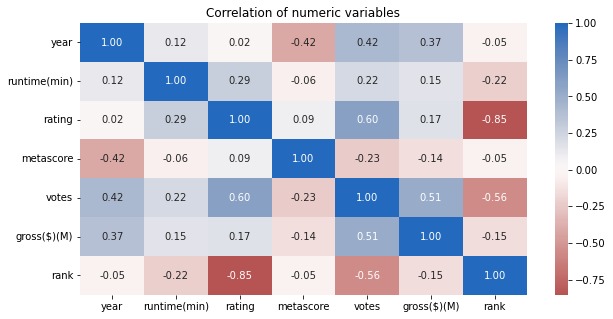

In [23]:
plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(),annot=True,cmap='vlag_r', fmt='.2f', center = 0);
plt.title('Correlation of numeric variables', fontsize = 12);

This heatmap gives us a numerical representaion of the graphs above

### Findings
* The data spanned movies released in a wide range of years (1921 – 2022). The year with the highest top movies was 1995. 
* The top 250 movies are high rated movies with a minimum of 8 and a maximum of 9.3. 75% of the data are rated around 8.
* The above cannot really be said for the metascore. The metascore has a minimum of 55 and a maximum of 100.
* The gross revenue of more than half of the movies are below 50M dollars and 25% of the movies are well above 140M dollars with the maximum over 800M dollars. These movies do well in revenue considering that most of these movies are from way old back where inflation had not taken over, so the money had a lot of value.
* Majority of the movies are above 100 min and below 175 min duration.
* High ranked movies have higher ratings.
* There is a positive correlation between ratings and votes which is no surprise since the ratings are the average of the total  ratings the voters gave.
* Votes and rank have the same relationship as rank and ratings. This can also be understood from the relationship between ratings and votes.
* There is no significant relationship between rankings and the metascore.


### Conclusion

The top 250 movies on IMDb are mostly dependent on the ratings which are done by voters(users) compared to the metascore which are done by the metacritics (movie critics).

### Limitation

The data was not enough to make concrete conclusions regarding the relationships between variables.